In [1]:
from warnings import filterwarnings
import pandas as pd
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
df = pd.read_json('../data.json')

In [3]:
data = pd.DataFrame(columns=['date', 'base', 'start_at', 'end_at'])
for rate, date, n, base, start_at, end_at in zip(df['rates'], df.index, range(df.shape[0]), df['base'], df['start_at'], df['end_at']):
    data = data.append({k:rate[k] for k in rate}, ignore_index=True)
    data['date'][n] = date
    data['base'][n] = base
    data['start_at'][n] = start_at
    data['end_at'][n] = end_at
data.index = data['date']
data.drop(['date'], axis=1, inplace=True)
data['start_at'] = data['start_at'].astype('datetime64[D]')
data['end_at'] = data['end_at'].astype('datetime64[D]')

In [4]:
data

,base,start_at,end_at,AUD,BGN,BRL,CAD,CHF,CNY,CZK,...,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,EUR,2019-01-01,2019-12-31,1.6273,1.9558,4.3930,1.5547,1.1239,7.8165,25.752,...,59.894,4.2964,4.6600,79.3589,10.2145,1.5555,36.807,6.1130,1.1397,16.5075
2019-01-03,EUR,2019-01-01,2019-12-31,1.6287,1.9558,4.2814,1.5392,1.1219,7.8019,25.683,...,59.679,4.2975,4.6660,78.2615,10.2808,1.5501,36.518,6.2248,1.1348,16.4149
2019-01-04,EUR,2019-01-01,2019-12-31,1.6189,1.9558,4.2889,1.5328,1.1256,7.8280,25.653,...,59.809,4.2957,4.6656,77.6790,10.2460,1.5525,36.587,6.1707,1.1403,16.1175
2019-01-07,EUR,2019-01-01,2019-12-31,1.6040,1.9558,4.2289,1.5281,1.1227,7.8421,25.572,...,59.980,4.2908,4.6625,76.5664,10.2235,1.5531,36.607,6.1325,1.1445,15.8644
2019-01-08,EUR,2019-01-01,2019-12-31,1.6042,1.9558,4.2604,1.5208,1.1232,7.8405,25.642,...,60.057,4.3055,4.6710,76.7197,10.1855,1.5549,36.705,6.2851,1.1440,16.0365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,EUR,2019-01-01,2019-12-31,1.6008,1.9558,4.5220,1.4577,1.0870,7.7652,25.499,...,56.471,4.2609,4.7733,69.0297,10.4473,1.5018,33.408,6.5834,1.1075,15.7605
2019-12-24,EUR,2019-01-01,2019-12-31,1.6019,1.9558,4.5246,1.4582,1.0878,7.7643,25.485,...,56.331,4.2598,4.7790,68.7932,10.4553,1.5017,33.412,6.5994,1.1080,15.7264
2019-12-27,EUR,2019-01-01,2019-12-31,1.5996,1.9558,4.5157,1.4592,1.0890,7.8025,25.509,...,56.574,4.2671,4.7818,69.2013,10.4363,1.5083,33.632,6.6449,1.1153,15.6649


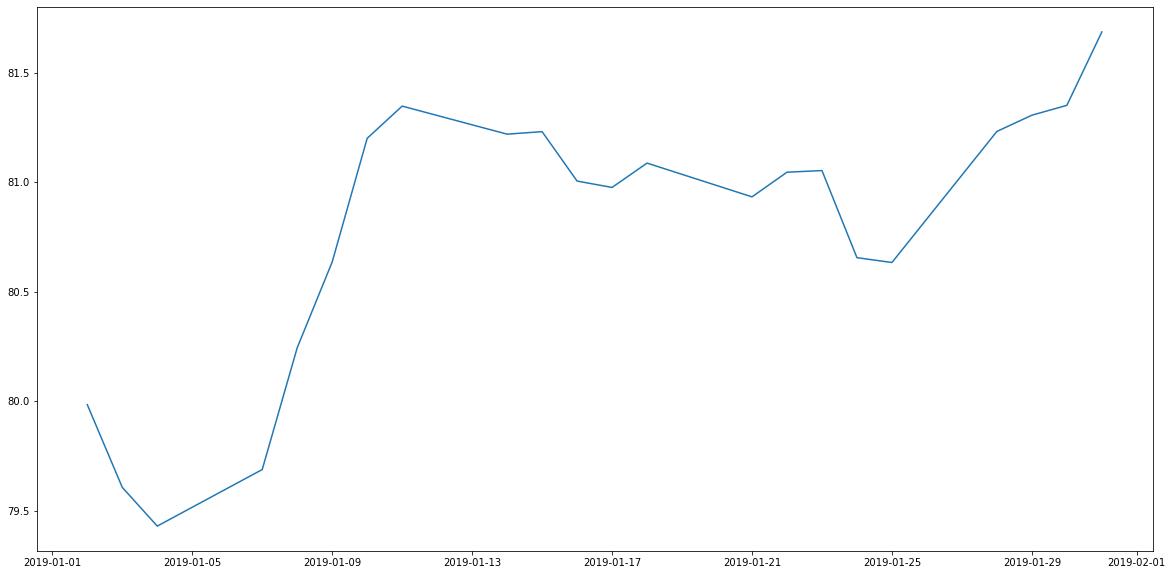

In [8]:
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(data[(data.index >= np.datetime64('2019-01-01')) & (data.index <= np.datetime64('2019-01-31'))].index, data[(data.index >= np.datetime64('2019-01-01')) & (data.index <= np.datetime64('2019-01-31'))]['INR'])